In [1]:
import argparse
import time
import msgpack
from enum import Enum, auto

import numpy as np

from planning_utils import a_star, heuristic, create_grid, prune_path, create_grid_and_edges, a_star_graph, closest_point
from udacidrone import Drone
from udacidrone.connection import MavlinkConnection
from udacidrone.messaging import MsgID
from udacidrone.frame_utils import global_to_local, local_to_global

import random
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

In [3]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)

In [4]:
# Static drone altitude (meters)
TARGET_ALTITUDE = 5

# Minimum distance stay away from obstacle (meters)
SAFETY_DISTANCE = 5
# TODO: Use `create_grid` to create a grid configuration space of
# the obstacle data.
grid, north_offset, east_offset, north_size, east_size = create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)

In [5]:
grid_start = (316,  445)
# goal_ne = (750., 370.)
grid_goal = (800., 350.)

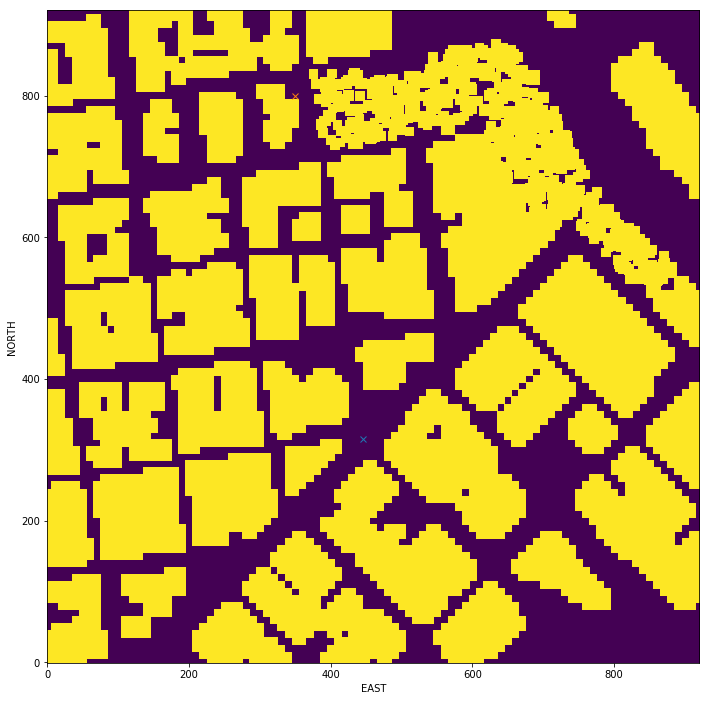

In [6]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower') 

plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'x')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [7]:
path, _ = a_star(grid, heuristic, grid_start, grid_goal)
pruned_path = prune_path(path)

Found a path.


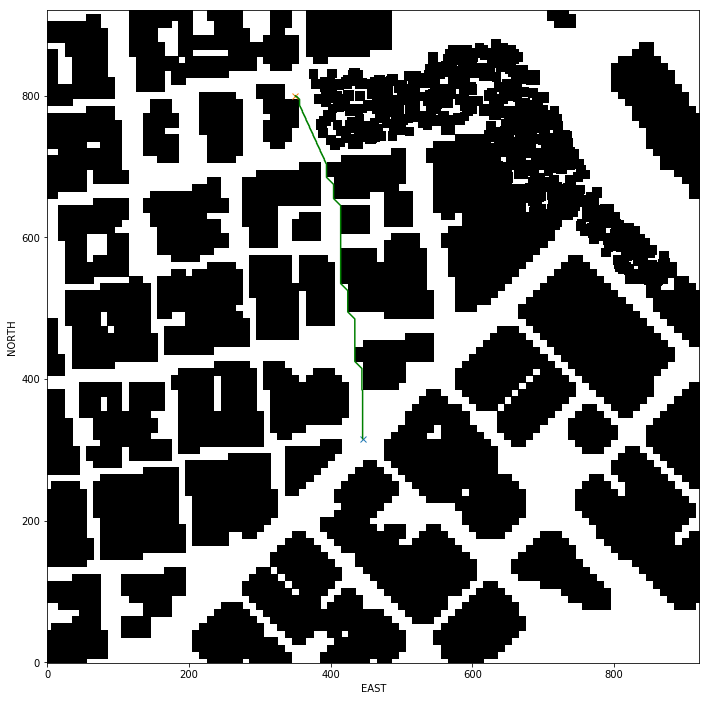

In [8]:
plt.imshow(grid, cmap='Greys', origin='lower')

# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'x')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

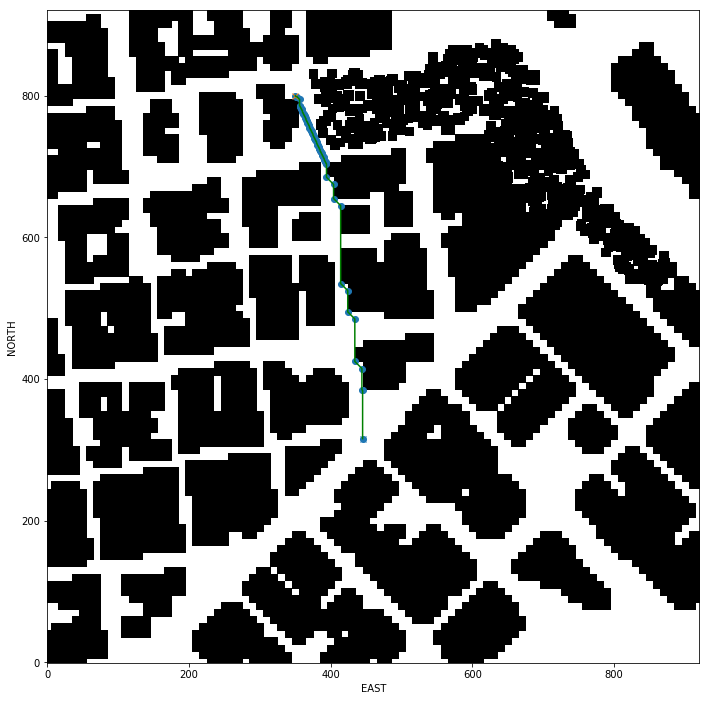

In [9]:
plt.imshow(grid, cmap='Greys', origin='lower')

plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'x')

pp = np.array(pruned_path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
plt.scatter(pp[:, 1], pp[:, 0])

plt.xlabel('EAST')
plt.ylabel('NORTH')

plt.show()

# Vornoi Graph

In [10]:
grid, edges = create_grid_and_edges(data, TARGET_ALTITUDE, SAFETY_DISTANCE)

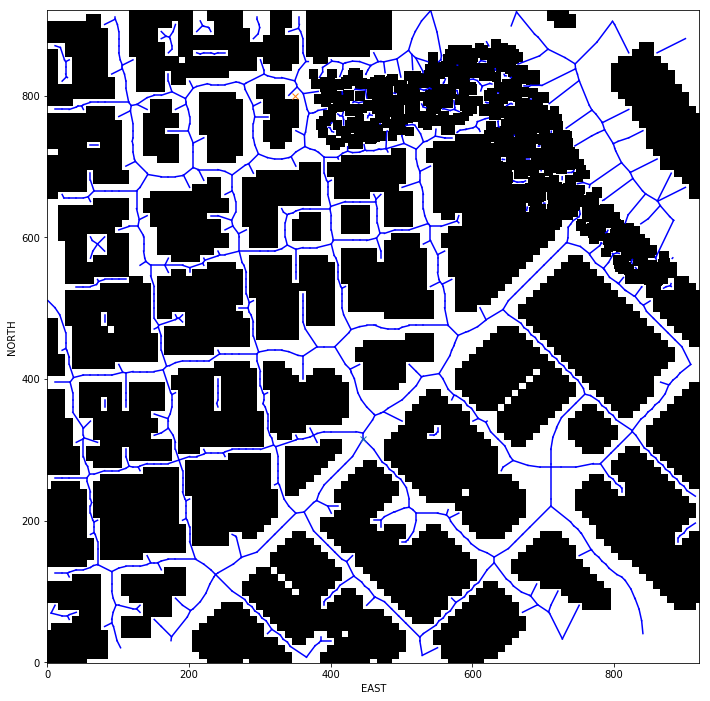

In [11]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower', cmap='Greys') 

for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

    
plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'x')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [12]:
# set to the Euclidean distance between the points
G = nx.Graph()
for e in edges:
    p1 = e[0]
    p2 = e[1]
    dist = np.linalg.norm(np.array(p2) - np.array(p1))
    G.add_edge(p1, p2, weight=dist)

In [13]:
start_ne_g = closest_point(G, grid_start)
goal_ne_g = closest_point(G, grid_goal)
print(start_ne_g)
print(goal_ne_g)

(315.76114, 445.76846)
(800.7610999999999, 340.76849000002)


In [14]:
graph_path, cost = a_star_graph(G, heuristic, start_ne_g, goal_ne_g)
print(len(path))
print(len(pruned_path))
print(len(graph_path))

Found a path.
486
93
53


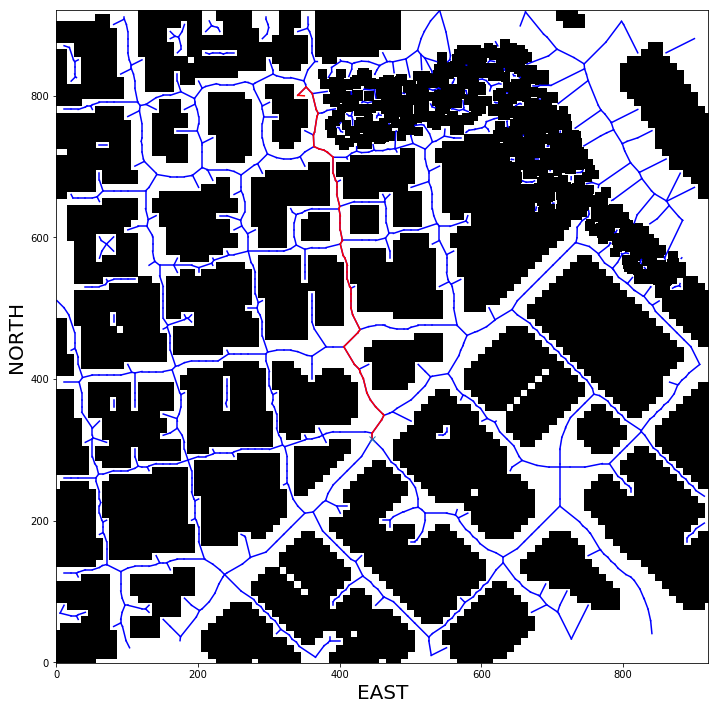

In [15]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower', cmap='Greys') 

for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')
    
plt.plot([grid_start[1], start_ne_g[1]], [grid_start[0], start_ne_g[0]], 'r-')
for i in range(len(graph_path)-1):
    p1 = graph_path[i]
    p2 = graph_path[i+1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'r-')
plt.plot([grid_goal[1], goal_ne_g[1]], [grid_goal[0], goal_ne_g[0]], 'r-')
    
plt.plot(grid_start[1], grid_start[0], 'x')

plt.xlabel('EAST', fontsize=20)
plt.ylabel('NORTH', fontsize=20)
plt.show()

In [16]:
pruned_graph_path = prune_path(graph_path)
print(len(pruned_graph_path))

49


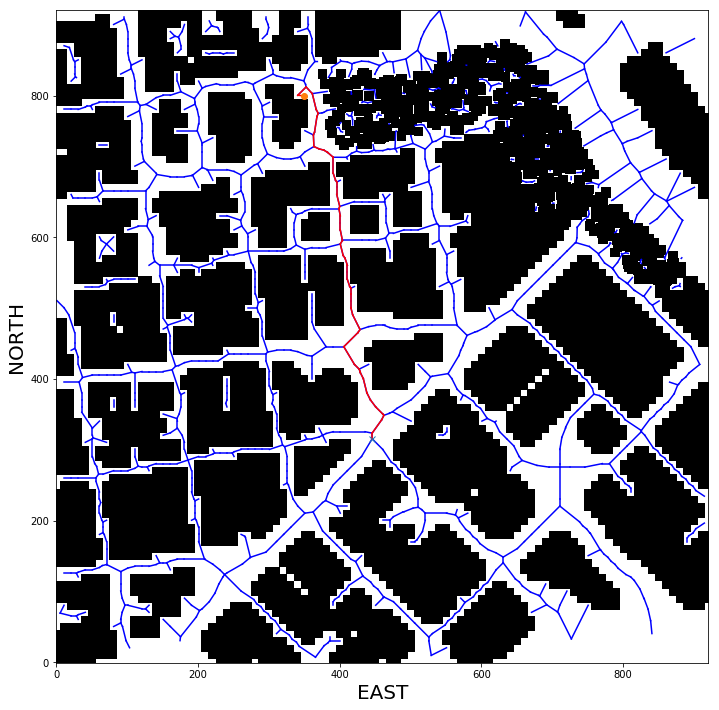

In [17]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower', cmap='Greys') 

for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')
    
plt.plot([grid_start[1], start_ne_g[1]], [grid_start[0], start_ne_g[0]], 'r-')
for i in range(len(pruned_graph_path)-1):
    p1 = pruned_graph_path[i]
    p2 = pruned_graph_path[i+1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'r-')
plt.plot([grid_goal[1], goal_ne_g[1]], [grid_goal[0], goal_ne_g[0]], 'r-')
    
plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'o')

plt.xlabel('EAST', fontsize=20)
plt.ylabel('NORTH', fontsize=20)
plt.show()